<a href="https://colab.research.google.com/github/i-ninte/machine_learning/blob/main/BA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the background information on your task
Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

###Build a predictive model to understand factors that influence buying behaviour

##Here is your task
##Explore and prepare the dataset
First, spend some time exploring the dataset in the “Getting Started” Jupyter Notebook provided in the Resources section below to understand the different columns and some basic statistics of the dataset. Then, you should consider how to prepare the dataset for a predictive model. You should think about any new features you want to create in order to make your model even better. You can make use of the Resources provided to get you started with this task.

##Train a machine learning model
When your data is ready for modelling, you should train a machine learning model to be able to predict the target outcome, which is a customer making a booking. For this task, you should use an algorithm that easily allows you to output information about how each variable within the model contributes to its predictive power. For example, a RandomForest is very good for this purpose.

##Evaluate model and present findings
After training your model, you should evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, you should create a visualisation to interpret how each variable contributed to the model. Finally, you should summarise your findings in a single slide to be sent to your manager. Use the “PowerPoint Template” provided in the Resources section below to create your summary and make use of the links provided to help with this task.

It is recommended that the analysis portion of this task is done in Python.

Once you’ve completed your PowerPoint, please submit your document below.

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [4]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df.shape

(50000, 14)

##Sales Channel

In [ ]:
per_internet = (df.sales_channel.value_counts().values[0] / df.sales_channel.count()) * 100
per_mobile = (df.sales_channel.value_counts().values[1] / df.sales_channel.count()) * 100


In [ ]:
print("percentage of bookings made through the internet: ", per_internet)
print("percentage of bookings made through phone calls: ", per_mobile)

percentage of bookings made through the internet:  88.764
percentage of bookings made through phone calls:  11.236


Most bookings were made over the internet

#Trip type

In [ ]:
per_round= df.trip_type.value_counts().values[0]/df.trip_type.count() * 100
per_oneway= df.trip_type.value_counts().values[1]/df.trip_type.count() * 100
per_circle= df.trip_type.value_counts().values[2]/df.trip_type.count() * 100

In [ ]:
print("percentage of round trips: ", per_round)
print("percentage of one way trips: ", per_oneway)
print("percentage of circle trips: ", per_circle)

percentage of round trips:  98.994
percentage of one way trips:  0.774
percentage of circle trips:  0.232


##Purchase Lead

<Axes: xlabel='purchase_lead', ylabel='Count'>

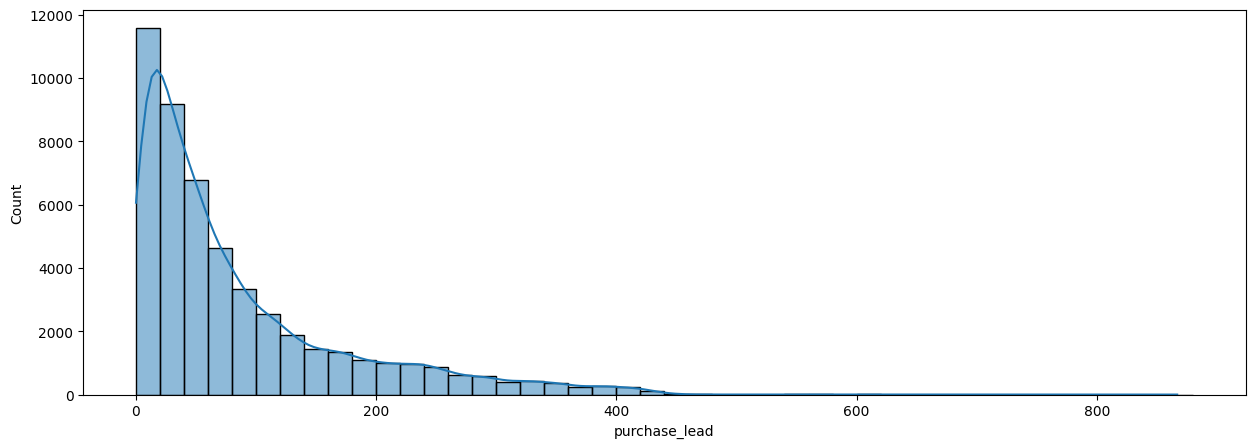

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20, kde=True)

here are a few bookings made more than 2 years before the travel date, which seems unlikely as they were not likely to be made in advance. These outliers could be due to customer cancellations and subsequent rebookings within a 6-month period

In [ ]:
(df.purchase_lead > 600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

Let's assume that no customer makes a booking more than a year and a half in advance. Therefore, we will remove all purchase_lead times greater than 600 days.

In [ ]:
df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,7,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,3,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,2,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,6,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,5,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,4,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,5,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,1,KIXMLE,Japan,0,0,1,7.00,1


In [ ]:
df= df[df.purchase_lead < 600]

In [ ]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

<ipython-input-26-60234f466601>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


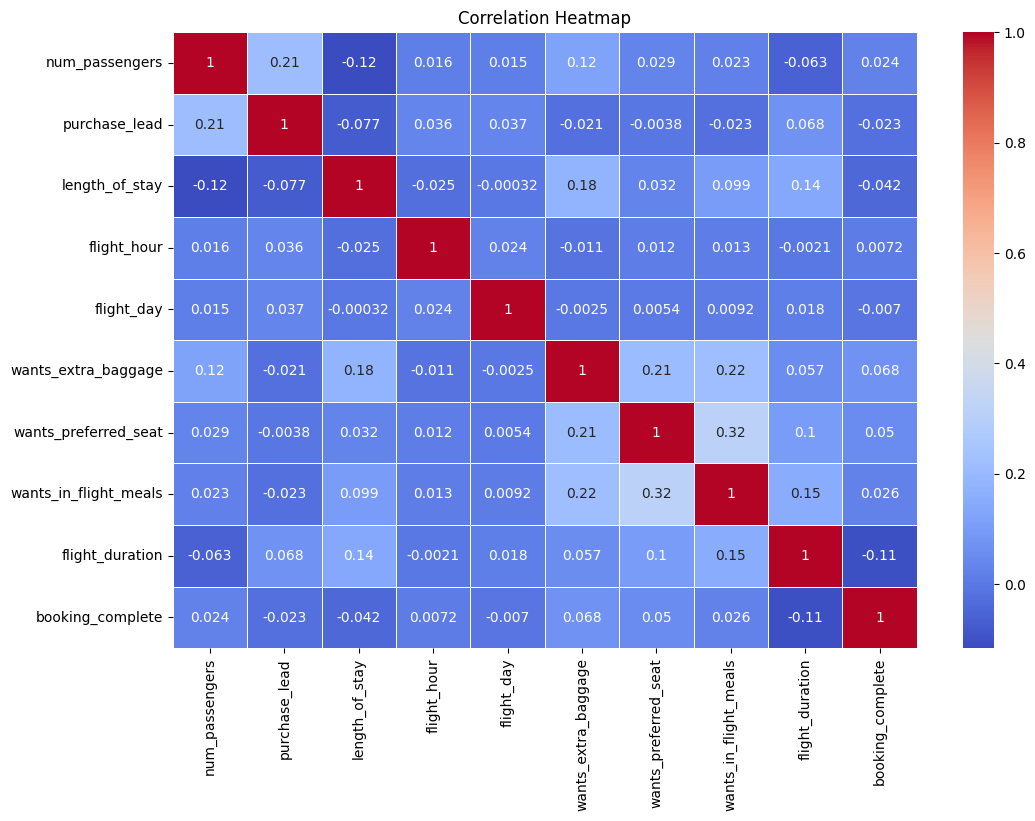

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


##Predictive Model

In [6]:
df.reset_index(drop=True)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


#SCALING

In [11]:
df['sales_channel']

0        Internet
1        Internet
2        Internet
3        Internet
4        Internet
           ...   
49995    Internet
49996    Internet
49997    Internet
49998    Internet
49999    Internet
Name: sales_channel, Length: 50000, dtype: object

In [24]:
# Replace values in the "sales_channel" column
df['sales_channel'].replace({'Mobile': 0, 'Internet': 1}, inplace=True)


In [28]:
df['trip_type'].replace({'RoundTrip': 0, 'OneWay': 1, 'CircleTrip':2}, inplace=True)

In [30]:
df_final = df.drop(["route", "booking_origin"], axis=1)


In [32]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaled_df= scaler.fit_transform(df_final)

In [33]:
#create a dataframe of scaled data
scaled_df= pd.DataFrame(scaled_df, columns=df_final.columns)

In [35]:
scaled_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.400684,0.355785,-0.095325,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,-0.419359
1,-0.579559,0.355785,-0.095325,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,-0.419359
2,0.400684,0.355785,-0.095325,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,-0.419359
3,-0.579559,0.355785,-0.095325,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,-0.419359
4,0.400684,0.355785,-0.095325,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,-0.419359


In [40]:
label= df['booking_complete']

In [36]:
df['booking_complete']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [37]:
scaled_df.drop('booking_complete', axis=1, inplace=True)


In [41]:
scaled_df['label']= label

In [42]:
scaled_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,label
0,0.400684,0.355785,-0.095325,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0
1,-0.579559,0.355785,-0.095325,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0
2,0.400684,0.355785,-0.095325,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0
3,-0.579559,0.355785,-0.095325,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0
4,0.400684,0.355785,-0.095325,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0


#splitting Train and Test Data

In [43]:
from sklearn.model_selection import train_test_split
X= scaled_df.iloc[:,:-1]
y= scaled_df['label']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [46]:
'''
create a function to fir and predict whether the customer would complete the booking and also for evaluation of the prediction model

'''


def model_fit_predict(model, X, y,X_predict):
  model.fit(X,y)
  return model.predict(X_predict)


def acc_score(y_true, y_pred):
  return accuracy_score(y_true,y_pred)

def pre_score(y_true, y_pred):
  return precision_score(y_true, y_pred)


def f_score(y_true, y_pred):
  return f1_score(y_true,y_pred)


##Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance
clf_rf = RandomForestClassifier()

# Fit the classifier to your scaled data
clf_rf.fit(X_train,y_train)


RandomForestClassifier()

###checking accuracy

In [49]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

# F1 score for training data
f1 = round(f1_score(y_train, y_pred_train), 2)

# Accuracy score of training data
acc = round(accuracy_score(y_train, y_pred_train), 2)

# Precision score for training data
pre = round(pre_score(y_train, y_pred_train), 2)

# Convert the floating-point numbers to strings before concatenating
print("accuracy, f1_score, and precision for training data respectively:", str(acc) + " " + str(f1) + " " + str(pre))


accuracy, f1_score, and precision for training data respectively: 1.0 1.0 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9996

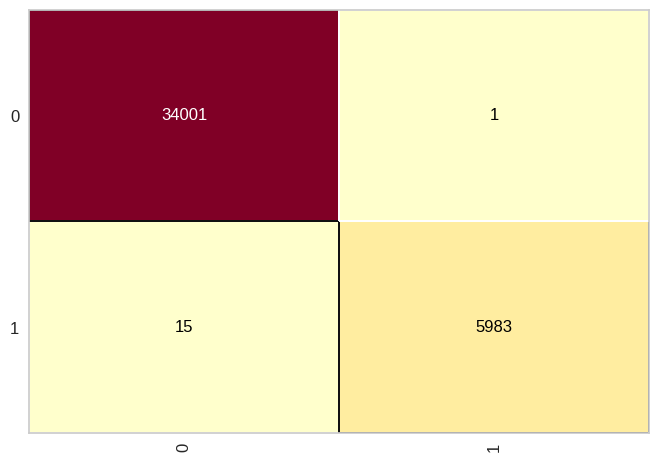

In [50]:
cm= ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

##Checking testing accuracy

In [51]:
#create an instance of the classifier and fit the testing data
clf_rf= RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

y_pred_test= model_fit_predict(clf_rf, X_train,y_train, X_test)

# F1 score for training data
f1_1= round(f1_score(y_test, y_pred_test), 2)

# Accuracy score of training data
acc_1 = round(accuracy_score(y_test, y_pred_test), 2)

# Precision score for training data
pre_1 = round(pre_score(y_test, y_pred_test), 2)

# Convert the floating-point numbers to strings before concatenating
print("accuracy, f1_score, and precision for training data respectively:", str(acc_1) + " " + str(f1_1) + " " + str(pre_1))



accuracy, f1_score, and precision for training data respectively: 0.85 0.07 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8515

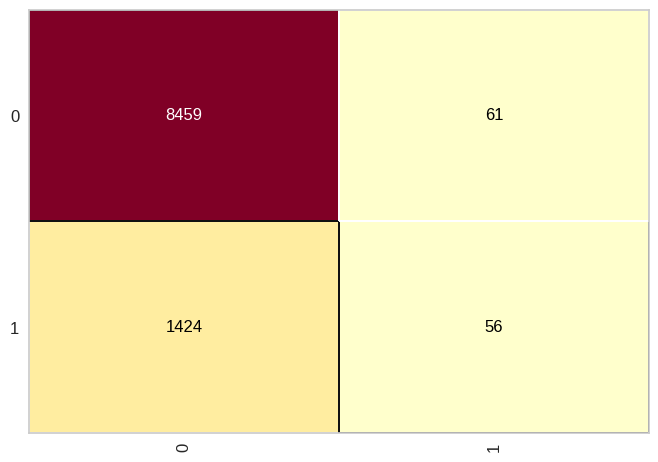

In [52]:
cm= ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_test, y_test)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

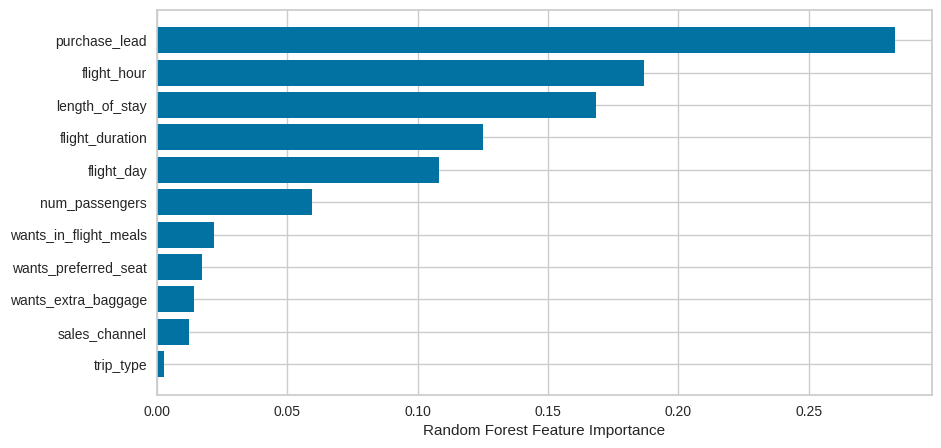

In [54]:
plt.figure(figsize=(10,5))
sorted_idx= clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

One major problem behind low f1 scoe is imbalancing dataset. We have higher enteries that are classified 0 than 1
We should reduce the number of enteries that are classified 0 to be equal to number of enteries that are classified  1.


##Balancing the dataset

In [55]:
scaled_df.label.value_counts()

0    42522
1     7478
Name: label, dtype: int64

In [57]:
##create a dataframe having all labels 0 with 1000 samples
scaled_df_0= scaled_df[scaled_df.label==0].sample(n=8000)

In [58]:
#concatenate the two dataframe, one having all labels as 1
scaled_df_new= pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)


In [59]:
#shuffle the dataframe rows
scaled_df_new= scaled_df_new.sample(frac=1).reset_index(drop=True)

In [60]:
scaled_df_new

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,label
0,-0.579559,0.355785,-0.095325,0.254941,0.146233,-0.012257,0.093127,0.703747,-0.649919,1.158082,0.195370,0
1,-0.579559,0.355785,-0.095325,-0.861692,1.739749,-0.936026,1.096754,0.703747,-0.649919,1.158082,-0.185430,1
2,2.361172,0.355785,-0.095325,0.365499,-0.089844,-0.566518,0.594940,0.703747,1.538654,1.158082,1.037139,0
3,0.400684,-2.810688,-0.095325,-0.143067,-0.502977,1.096267,1.598567,0.703747,-0.649919,-0.863497,-0.185430,0
4,1.380928,0.355785,-0.095325,-0.784302,-0.561996,0.172497,0.093127,-1.420965,1.538654,1.158082,-1.742035,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15473,0.400684,0.355785,-0.095325,0.531335,-0.532487,-1.675042,-1.412314,-1.420965,-0.649919,-0.863497,-0.185430,1
15474,0.400684,0.355785,-0.095325,-0.717967,-0.502977,-0.566518,-1.412314,0.703747,-0.649919,-0.863497,-0.439297,1
15475,3.341415,0.355785,-0.095325,0.896176,-0.502977,1.465775,0.093127,0.703747,1.538654,1.158082,-0.572911,0
15476,3.341415,0.355785,-0.095325,1.603745,-0.591506,-0.936026,-0.910501,0.703747,1.538654,-0.863497,-0.185430,1


In [61]:
X= scaled_df_new.iloc[:,:-1]
y= scaled_df_new['label']
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)




In [62]:
#create an instance of the classifier and fit the testing data
clf_rf= RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

y_pred_test= model_fit_predict(clf_rf, X_train,y_train, X_test)

# F1 score for training data
f1_1= round(f1_score(y_test, y_pred_test), 2)

# Accuracy score of training data
acc_1 = round(accuracy_score(y_test, y_pred_test), 2)

# Precision score for training data
pre_1 = round(pre_score(y_test, y_pred_test), 2)

# Convert the floating-point numbers to strings before concatenating
print("accuracy, f1_score, and precision for training data respectively:", str(acc_1) + " " + str(f1_1) + " " + str(pre_1))



accuracy, f1_score, and precision for training data respectively: 0.62 0.61 0.61


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.622093023255814

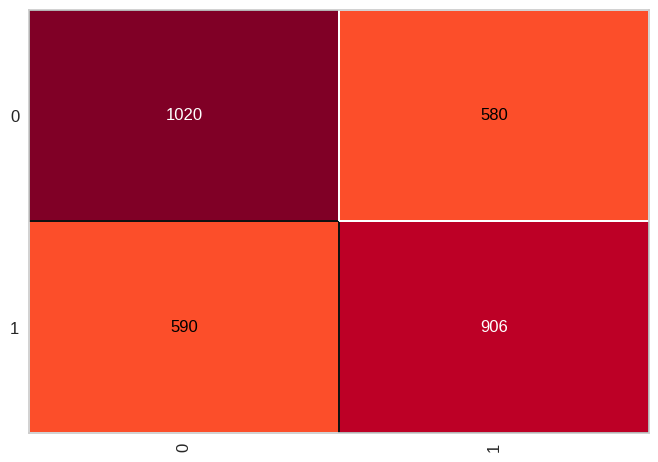

In [63]:
cm= ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_test, y_test)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

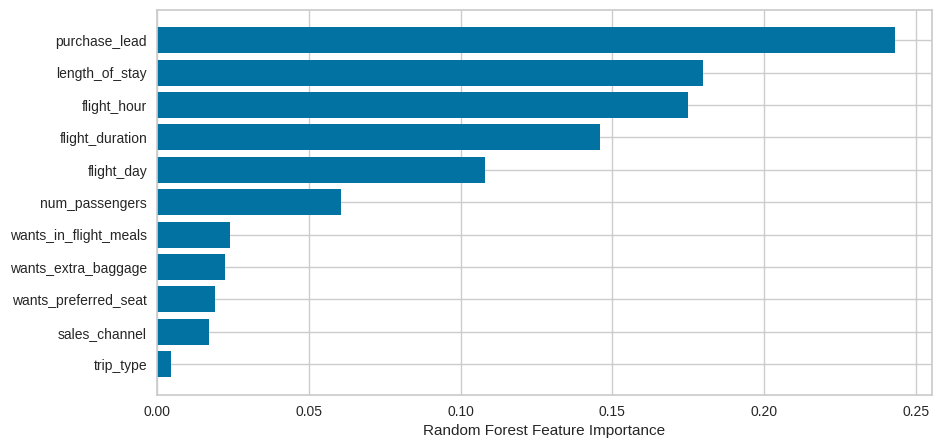

In [65]:
plt.figure(figsize=(10,5))
sorted_idx= clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")